In [46]:
'''
- 여러 규칙을 순차적으로 적용하면서 분류나 예측을 진행하는 단순 알고리즘 모델
- 분류(Classification)와 회귀(Regression)분석에서 모두 사용가능하며,
  분류분석에 주로 사용됨
- 의사결정나무에서 확장된 모델이 랜덤포레스트(Random Forest)이 대표적..

- 독립변수 : 연속형 데이터 (숫자값들)
- 종속변수 : 범주형 데이터 (구분 가능한 값들)

- 순서
  1. 데이터 생성
  2. 전처리
  3. 학습모델 생성 (fit() 함수 사용)
  4. 모델 테스트(예측) (predict() 함수 사용)
  5. 평가
'''

'\n- 여러 규칙을 순차적으로 적용하면서 분류나 예측을 진행하는 단순 알고리즘 모델\n- 분류(Classification)와 회귀(Regression)분석에서 모두 사용가능하며,\n  분류분석에 주로 사용됨\n- 의사결정나무에서 확장된 모델이 랜덤포레스트(Random Forest)이 대표적..\n\n- 독립변수 : 연속형 데이터 (숫자값들)\n- 종속변수 : 범주형 데이터 (구분 가능한 값들)\n\n- 순서\n  1. 데이터 생성\n  2. 전처리\n  3. 학습모델 생성 (fit() 함수 사용)\n  4. 모델 테스트(예측) (predict() 함수 사용)\n  5. 평가\n'

### exe-1) 사람의 키와 머리카락의 길이로 성별 예측하기
##### - 종속변수 : 성별
##### - 독립변수 : 키, 머리카락 길이

In [47]:
from sklearn import tree

In [48]:
### 데이터 생성
# 독립변수 : x
x = [[180,15], [177,42], [156,35], [174, 5], [166,33]]
# 종속변수 : y
y = ['man', 'women', 'women', 'man', 'women']
label_names = ['height', 'hair Length']

### 모델 객체 생성하기
# - criterion : 품질측정 방법(지니불순도 방법, 엔트로피 방법)
#  -- 엔트로피 : 균형잡힌 트리를 생성
#  -- 지니불순도 : 가장 빈도 높은 클래스를 먼저 분할하는 방법
# - random-state : seed 설정과 동일한 개념.. 보통 0과 42 숫자 많이 사용..
model = tree.DecisionTreeClassifier(criterion='entropy', random_state=0)
print('model = \n', model)
print('------------------------------------------------------------------')

model = 
 DecisionTreeClassifier(criterion='entropy', random_state=0)
------------------------------------------------------------------


In [49]:
### 학습모델 생성
fit = model.fit(x, y)
print('fit = \n', fit)
print('------------------------------------------------------------------')

fit = 
 DecisionTreeClassifier(criterion='entropy', random_state=0)
------------------------------------------------------------------


In [50]:
### 학습모델 평가하기

# 결정계수..
# - 값의 범위 : 0 ~ 1
# - 1에 가까울 수록 학습모델이 우수함
# - 결과값에 * 100을 하면 백분율로 표시됨
# - 0.3 이상이면 학습모델 선택 고려..
accuracy_score = fit.score(x, y)
print('accuracy_score = ', accuracy_score)

accuracy_score =  1.0


In [51]:
### 예측(테스트) 하기
# test 데이터 생성
mydata = [[177, 42]]

# 예측(테스트) 시키기
# 예측 시에는 독립변수만 넣어줍니다.(답은 안알려 줍니다.)
# - 답은 예측결과...
pred = fit.predict(mydata)
print('예측결과 = ', pred)

예측결과 =  ['women']


In [52]:
### 시각화 하기
# 라이브러리 설치 : pip install pydotplus
import pydotplus

In [55]:
# conda install -c conda-forge graphviz
# conda 설치 후 실행 오류가 계속 날 경우에는
# pip install graphviz
import graphviz
import collections

dot_data =  digraph Tree {
node [shape=box, style="filled, rounded", color="black", fontname="helvetica"] ;
edge [fontname="helvetica"] ;
0 [label="hair Length <= 24.0\nentropy = 0.971\nsamples = 5\nvalue = [2, 3]", fillcolor="#bddef6"] ;
1 [label="entropy = 0.0\nsamples = 2\nvalue = [2, 0]", fillcolor="#e58139"] ;
0 -> 1 [labeldistance=2.5, labelangle=45, headlabel="True"] ;
2 [label="entropy = 0.0\nsamples = 3\nvalue = [0, 3]", fillcolor="#399de5"] ;
0 -> 2 [labeldistance=2.5, labelangle=-45, headlabel="False"] ;
}
------------------------------------------------------------------
graph =  <pydotplus.graphviz.Dot object at 0x00000208063A09D0>
------------------------------------------------------------------
edges =  defaultdict(<class 'list'>, {})
------------------------------------------------------------------
edges 처리 후 변수 =  defaultdict(<class 'list'>, {'0': [1, 2]})
------------------------------------------------------------------


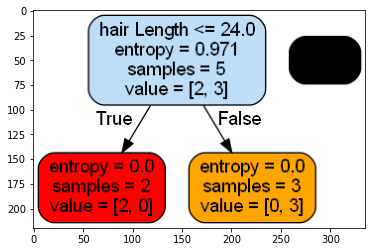

In [66]:
### 그래프 그리기
# model : 위에서 생성한 모델
# feature_names : 독립변수 각항목 이름
# out_file : 파일로 저장할건지 여부
# filled : 도형 안쪽 칠할건지 여부
# rounded : 도형 사각 영역에 라운드 넣을 건지 여부
# 그래프 속성 설정
dot_data = tree.export_graphviz(model,
                                feature_names = label_names,
                                out_file = None,
                                filled = True,
                                rounded = True)
print('dot_data = ', dot_data)
print('------------------------------------------------------------------')

# 최종 사용할 그래프
graph = pydotplus.graph_from_dot_data(dot_data)
print('graph = ', graph)
print('------------------------------------------------------------------')

# 독립변수의 갯수만큼 색상 지정
color = ('red', 'orange')

# list type으로 변경
edges = collections.defaultdict(list)
print('edges = ', edges)
print('------------------------------------------------------------------')

### 트리 데이터 생성하기
for e in graph.get_edge_list():
    edges[e.get_source()].append(int(e.get_destination()))
    
print('edges 처리 후 변수 = ', edges)
print('------------------------------------------------------------------')

### 트리 그리기
for e in edges:
    edges[e].sort()
    
    for i in range(2):
        dest = graph.get_node(str(edges[e][i]))[0]
        dest.set_fillcolor(color[i])
        
# graph 객체를 이미지 파일로 생성하기
graph.write_png('./tree.png')

import matplotlib.pyplot as plt
# 생성된 png 이미지 읽어 들이기
img = plt.imread('./tree.png')
# 이미지 보여주기
plt.imshow(img)
plt.show()